# Mandatory assignment 1



<b> Research question </b>

<i>  How is attendance affected by various factors? </i>
* Does the instructor affect student attendance?
* Does difficulty affect student attendance?
* Does number of repitions of course affect attendance?


Research attendance, does 4 indicate low or high attendance?

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
#import pandas_profiling

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def create_folder(name):
    try:
        os.mkdir(name)
    except FileExistsError as FEE:
        print(FEE)
        

In [2]:
create_folder("images")

In [3]:
df = pd.read_csv('data-sets/data.csv')
df = df[df.instr == 3]

In [23]:
df.head(5)
#save_fig("klaus")

instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
2219      3      3          1           0           1   3   3   3   3   3   
2220      3      3          1           0           1   4   4   4   4   4   
2221      3      3          1           0           1   1   1   1   1   1   
2222      3      3          3           0           1   4   4   4   4   4   
2223      3      3          3           0           4   5   5   5   5   5   

      ...  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  
2219  ...    3    3    3    3    3    3    3    3    3    3  
2220  ...    4    4    4    4    4    4    4    4    4    4  
2221  ...    1    1    1    1    1    1    1    1    1    1  
2222  ...    4    4    4    4    4    4    4    4    4    4  
2223  ...    5    5    5    5    5    5    5    5    5    5  

[5 rows x 33 columns]

In [5]:
df.count()

instr         3601
class         3601
nb.repeat     3601
attendance    3601
difficulty    3601
Q1            3601
Q2            3601
Q3            3601
Q4            3601
Q5            3601
Q6            3601
Q7            3601
Q8            3601
Q9            3601
Q10           3601
Q11           3601
Q12           3601
Q13           3601
Q14           3601
Q15           3601
Q16           3601
Q17           3601
Q18           3601
Q19           3601
Q20           3601
Q21           3601
Q22           3601
Q23           3601
Q24           3601
Q25           3601
Q26           3601
Q27           3601
Q28           3601
dtype: int64

As the dataset dosent claim if attendance is high and the course is difficult based on the answer (0-5), we choose to establish a hypothesis to determine what the number means.

If a student has a high attendance for a course, then we must assume that the majotiy of students must think that the course was easy. Therefore, as the plot shows below, the number of student with high attendance also answered the lowest number as how diffuclt the course had been.

In [22]:
corr_matrix = df.corr()
corr_matrix["attendance"].sort_values(ascending=False)

attendance    1.000000
difficulty    0.448642
Q17           0.204036
Q22           0.186918
Q25           0.184211
Q21           0.181961
Q14           0.178606
Q28           0.178551
Q15           0.170991
Q20           0.169295
Q13           0.155979
Q19           0.155609
Q9            0.145770
Q23           0.143494
Q26           0.142976
Q3            0.141297
Q11           0.138821
Q24           0.127903
Q18           0.125817
Q6            0.119568
Q16           0.116146
Q27           0.114928
Q2            0.109890
Q10           0.108163
Q5            0.104760
Q4            0.098719
Q7            0.096760
Q12           0.089034
Q8            0.086839
Q1            0.056634
class        -0.035921
nb.repeat    -0.046626
instr              NaN
Name: attendance, dtype: float64

In [6]:
df_corr = df[['attendance', 'difficulty']]
df_corr.corr()

attendance  difficulty
attendance    1.000000    0.448642
difficulty    0.448642    1.000000

Saving figure count_difficulty_with_attendance


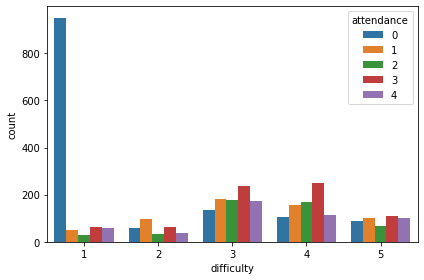

In [8]:
sn.countplot(data=df, x="difficulty", hue='attendance')
save_fig("count_difficulty_with_attendance")
plt.show()

Saving figure count_q9_with_attendance


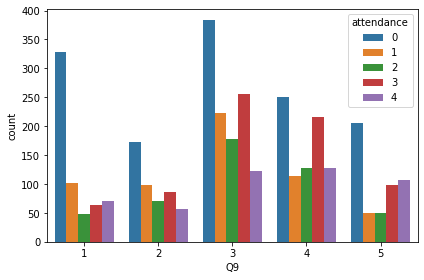

In [9]:
# Q9: difficulty - Level of difficulty of the course as perceived by the student; values taken from 1,2,3,4,5
sn.countplot(data=df, x="Q9", hue='attendance')
save_fig("count_q9_with_attendance")
plt.show()

Saving figure count_q14_with_attendance


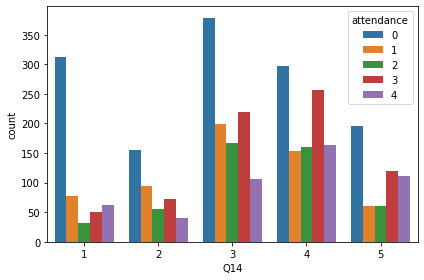

In [10]:
# Q14: The Instructor came prepared for classes.
sn.countplot(data=df, x="Q14", hue='attendance')
save_fig("count_q14_with_attendance")
plt.show()

Saving figure count_q17_with_attendance


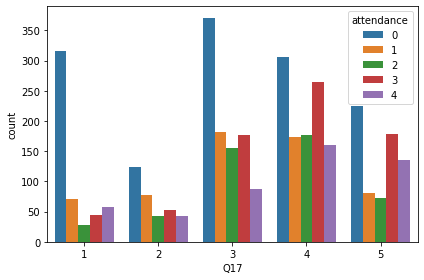

In [11]:
# Q17: The Instructor arrived on time for classes.
sn.countplot(data=df, x="Q17", hue='attendance')
save_fig("count_q17_with_attendance")
plt.show()

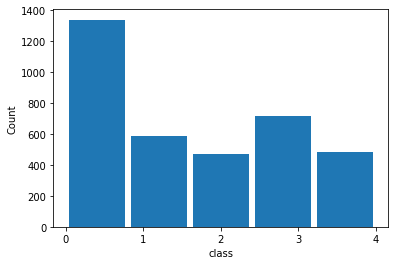

In [21]:
plt.hist(df['attendance'], bins=5, histtype='bar', rwidth=0.9)
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4])
plt.show()

In [52]:
# What is the attendance score of the
# student for each of the instructors?
df_instr_three = df[df.instr == 3]
instructor_data = df_instr_three['attendance'].value_counts(normalize=True).sort_index() * 100
instructor_data

0    37.211886
1    16.245487
2    13.163010
3    19.938906
4    13.440711
Name: attendance, dtype: float64

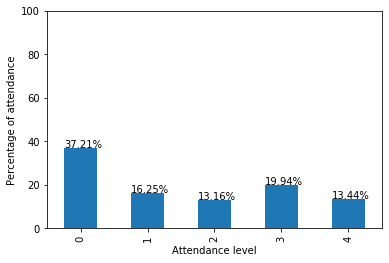

In [71]:
mydata = instructor_data.plot.bar()
mydata.set_ylim((0,100))
mydata.set_xlabel("Attendance level")
mydata.set_ylabel("Percentage of attendance")

for p in mydata.patches:
    mydata.annotate(str(round(p.get_height(),2))+"%", (p.get_x(), p.get_height()))

plt.show()